# Export BDT vars from .root to numpy

In [19]:
import uproot
import numpy as np
import os
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")

from utils import data_dir

In [4]:
# Input variables for the BDT are stored here
bdtvar_path = f"{data_dir}/BDT_Vars_root"
print(f"Available root files:")
print("\n".join([f"* {file}" for file in os.listdir(bdtvar_path)]))

Available root files:
* new_pi0_1GeV_40-250GeV_100k.root
* new_gamma_1GeV_40-250GeV_100k.root
* new_scalar1_1GeV_40-250GeV_100k.root
* new_axion2_1GeV_40-250GeV_100k.root
* new_electron_1GeV_40-250GeV_100k.root
* new_axion1_1GeV_40-250GeV_100k.root


In [6]:
particles = ["pi0", "gamma", "scalar1", "axion1", "axion2"]

In [16]:
for particle in particles:    
    tree = uproot.open(f"{bdtvar_path}/new_{particle}_1GeV_40-250GeV_100k.root")["fancy_tree;1"]
    print(tree)
    
    keys = tree.arrays(library="np").keys()
    print("Keys:")
    print("\n".join([f"* {key}" for key in keys]))
    
    break

<TTree 'fancy_tree' (54 branches) at 0x2b38bc43f750>
Keys:
* total_e
* prelayer_e
* firstlayer_e
* secondlayer_e
* thirdlayer_e
* depth_weighted_total_e
* depth_weighted_total_e2
* prelayer_x
* prelayer_x2
* firstlayer_x
* firstlayer_x2
* secondlayer_x
* secondlayer_x2
* thirdlayer_x
* thirdlayer_x2
* prelayer_y
* prelayer_y2
* firstlayer_y
* firstlayer_y2
* secondlayer_y
* secondlayer_y2
* thirdlayer_y
* thirdlayer_y2
* frac_pre
* frac_first
* frac_second
* frac_third
* shower_depth
* shower_depth_width
* pre_lateral_width_x
* first_lateral_width_x
* second_lateral_width_x
* third_lateral_width_x
* pre_lateral_width_y
* first_lateral_width_y
* second_lateral_width_y
* third_lateral_width_y
* pre_lateral_width_cell
* first_lateral_width_cell
* second_lateral_width_cell
* third_lateral_width_cell
* pre_Eratio
* first_Eratio
* second_Eratio
* third_Eratio
* second_R_eta
* second_R_phi
* second_lateral_width_eta_weta2
* first_lateral_width_eta_w3
* first_lateral_width_eta_w20
* first_frac

Features that we're actually using:
```
| Name           | Definition                                                               |
|----------------|--------------------------------------------------------------------------|
| $f_1$          | Fraction of energy in the first layer                                    |
| $f_{side}$     | Fraction of energy outside core of three central strips                  |
| $w_{s20}$      | Shower width for 20 strips around maximum strip                          |
| $w_{3}$        | Shower width for three strips around maximum strip                       |
| $\Delta E_{s}$ | Difference between the energy associated with the                        |
| $E_{ratio}$    | Ratio of the energy difference associated with the                       |
| $R_{\eta}$     | Ratio in $\eta$ of cell energies in $3\times 7$ versus $7 \times 7$ cell |
| $R_{\phi}$     | Ratio in $\phi$ of cell energies in $3\times3$ and $3\times7$ cells      |
```

But for this test, we'll cross-correlate ALL of them just to see if there are any good results.

## Test for consistent ordering

In [45]:
total_e = np.array(tree["total_e"].array())

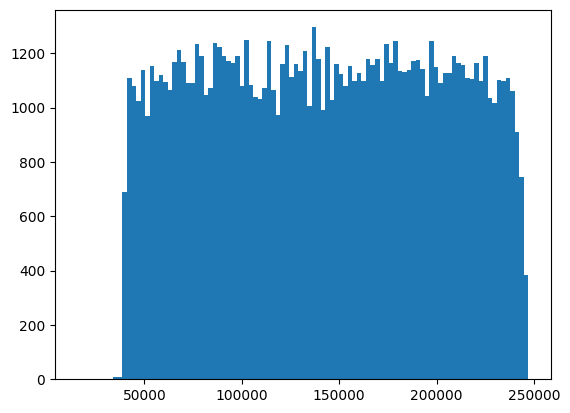

In [46]:
plt.hist(total_e, bins=100);

In [69]:
# Fetch our own data
cloud = np.load(f"{data_dir}/processed/{particle}_cloud.npy")

In [70]:
cloud_energy = cloud[:,:,2].sum(axis=1)

In [71]:
cloud_energy.shape

(100000,)

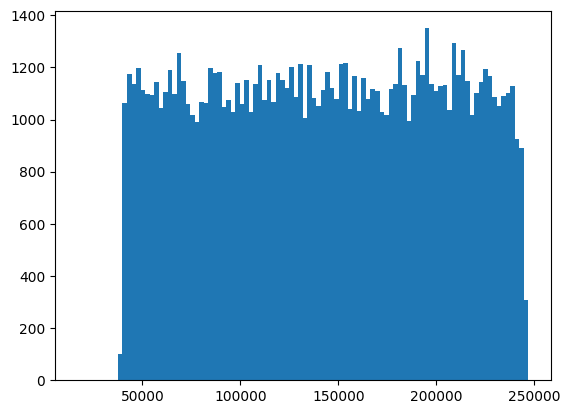

In [73]:
plt.hist(cloud_energy, bins=100);

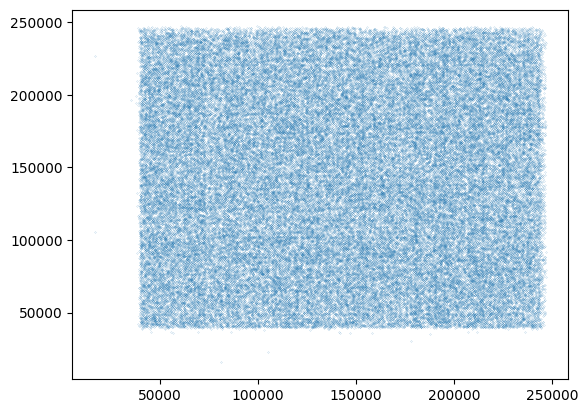

In [74]:
plt.scatter(cloud_energy, total_e, s=0.01);